In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read our csv files
df = pd.read_csv('engineering_sensor_data.csv')

In [3]:
#check data type on our dataframe
print(df.dtypes)


Sensor_ID          object
Temperature_C     float64
Pressure_psi      float64
Vibration_mm_s    float64
RPM                 int64
Status             object
Timestamp          object
dtype: object


In [4]:
print(df)

    Sensor_ID  Temperature_C  Pressure_psi  Vibration_mm_s   RPM   Status  \
0          S4          74.55        182.93            2.75  4577  Warning   
1          S5          77.17        199.71            2.40  3901       OK   
2          S3          80.12        204.04            2.40  2387       OK   
3          S5          80.43        183.91            1.36  2303       OK   
4          S5          75.28        171.19            2.90  1592  Warning   
..        ...            ...           ...             ...   ...      ...   
195        S3          66.57        177.28            3.01  1249  Warning   
196        S3          78.92        204.52            2.19  1390  Warning   
197        S1          73.75        216.79            3.13  4853       OK   
198        S5          73.00        199.78            2.32  1334       OK   
199        S4          95.25        167.24            2.74  1628  Warning   

               Timestamp  
0    2025-01-01 00:00:00  
1    2025-01-01 01:00

In [5]:
#since our time stamp was object lets convert it for datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#lets out outer for our time for easy 
df['Time'] = df['Timestamp'].dt.strftime('%H:%M:%S')

In [6]:
print(df)

    Sensor_ID  Temperature_C  Pressure_psi  Vibration_mm_s   RPM   Status  \
0          S4          74.55        182.93            2.75  4577  Warning   
1          S5          77.17        199.71            2.40  3901       OK   
2          S3          80.12        204.04            2.40  2387       OK   
3          S5          80.43        183.91            1.36  2303       OK   
4          S5          75.28        171.19            2.90  1592  Warning   
..        ...            ...           ...             ...   ...      ...   
195        S3          66.57        177.28            3.01  1249  Warning   
196        S3          78.92        204.52            2.19  1390  Warning   
197        S1          73.75        216.79            3.13  4853       OK   
198        S5          73.00        199.78            2.32  1334       OK   
199        S4          95.25        167.24            2.74  1628  Warning   

              Timestamp      Time  
0   2025-01-01 00:00:00  00:00:00  
1  

In [7]:

mean_temp = df.groupby('Time')['Temperature_C'].mean()


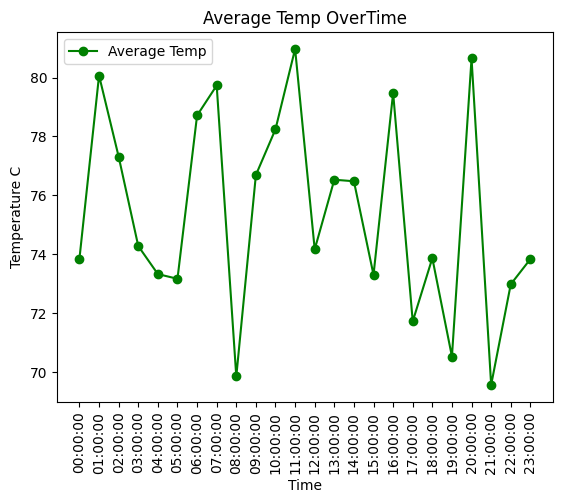

In [8]:
#average temperature Over time

#lets group the average temp per time and reset its index
mean_temp = df.groupby('Time')['Temperature_C'].mean().reset_index()

#and rename each columns
mean_temp.columns = ['Time','Temperature_C']


plt.plot(mean_temp['Time'],mean_temp['Temperature_C'], marker='o', linestyle='-', color='green', label="Average Temp")
plt.xlabel('Time')
plt.ylabel('Temperature C')
plt.title('Average Temp OverTime')
plt.xticks(rotation=90)

plt.legend()


plt.show()

In [9]:
print(mean_temp.nlargest(3,'Temperature_C'))
# the highest Peak for  was on 11:00 am, 20:00 pm and 01:00 am 

        Time  Temperature_C
11  11:00:00      80.972500
20  20:00:00      80.648750
1   01:00:00      80.068889


In [10]:
print(mean_temp.nsmallest(3,'Temperature_C'))
# the lowest Peak was on 21:00 pm, 8:00 am and 19:00 pm

        Time  Temperature_C
21  21:00:00       69.55625
8   08:00:00       69.84250
19  19:00:00       70.52000


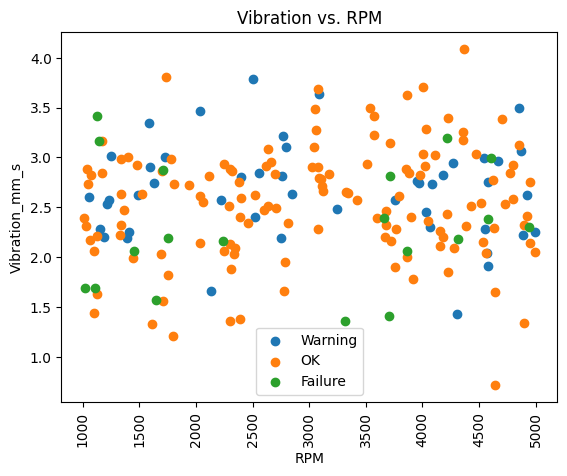

In [11]:


for status in df['Status'].unique():
    subset = df[df['Status'] == status]
    plt.scatter(subset['RPM'],subset['Vibration_mm_s'],label = status)


plt.xlabel('RPM')
plt.ylabel('Vibration_mm_s')
plt.title('Vibration vs. RPM')
plt.xticks(rotation=90)

plt.legend()


plt.show()

In [12]:
mean_temp_sensor = df.groupby('Sensor_ID')['Temperature_C'].mean().reset_index

In [13]:
print(mean_temp_sensor)

<bound method Series.reset_index of Sensor_ID
S1    73.607442
S2    76.012857
S3    75.249730
S4    76.038163
S5    76.348889
Name: Temperature_C, dtype: float64>


Text(0.5, 1.0, 'Failure Count by Sensor')

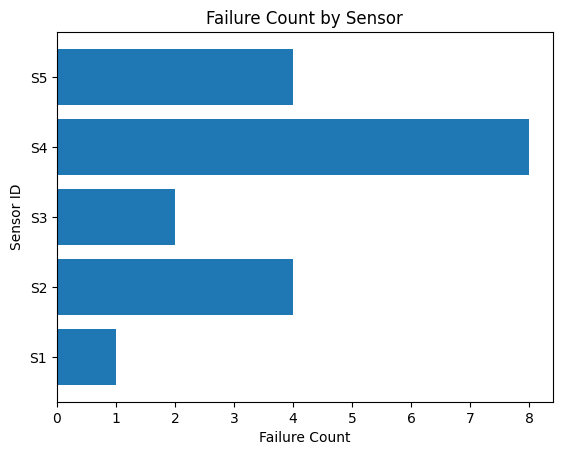

In [22]:
sensor_failure_count = df[df['Status']=='Failure'].groupby('Sensor_ID').size().reset_index()

sensor_failure_count.columns = ['Sensor_ID','Failure_Count']

plt.barh(sensor_failure_count['Sensor_ID'],sensor_failure_count['Failure_Count'])
plt.xlabel('Failure Count')
plt.ylabel('Sensor ID')
plt.title("Failure Count by Sensor")